---
# Data Analysis of KALLISTO generated Abundance tables 
---

The purpose of this notebook is to inspect and assess the tsv tables generated by KALLISTO

(nope we don't do that here right now...) We try if we can use `Sleuth` to look at our data...

In [1]:
import os 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import altair as alt 
import matplotlib.colors as colors
import numpy as np 
from ops.ops import from_kwargs

In [2]:
files_loc = "../data/KALLISTO"
os.chdir(files_loc)
files = os.listdir()
files

['A549_CTR.tsv',
 'A549_KD.tsv',
 'A549_KO.tsv',
 'A549_NTC.tsv',
 'H358_CTR.tsv',
 'H358_KD.tsv',
 'H838_CTR.tsv',
 'H838_KD.tsv',
 'merged_all.csv']

In [3]:
ID_FEATURES = {
    "feature" : -2,
    "name" : -4, 
    "gene_id" : 0,
}
def read_tsv(filename):
    df = pd.read_table(filename)
    for f in ID_FEATURES:
        fdx = ID_FEATURES[f]
        df[f] = get_ID_feature(df, fdx )
    return df

def get_ID_feature(df, idx):
    tmp = list(df["target_id"])
    tmp = [i.split("|")[idx] for i in tmp]
    features = [i if i != "-" else None for i in tmp]
    return features 

In [4]:
dataframes = {}
for file in files: 
    file_name = file.replace(".tsv", "")
    dataframes.update(
        {
            file_name : read_tsv(file)
        }
    )

KeyError: 'target_id'

In [ ]:
all_df = []
for i in dataframes:
    length = len(dataframes[i])
    tmp = dataframes[i]
    tmp["sample"] = [i for k in range(length)]
    all_df.append(tmp)

all_df = pd.concat(all_df)
all_df.to_csv("all_df.csv")

In [ ]:
print(set(all_df["sample"]))

{'H838_CTR', 'A549_KD', 'H358_KD', 'A549_NTC', 'H838_KD', 'H358_CTR', 'A549_KO', 'A549_CTR'}


In [ ]:
a549_ctr = dataframes["A549_CTR"]
a549_kd = dataframes["A549_KD"]

In [ ]:
# test if order is identical

firsts = a549_kd["target_id"][1000]
seconds = a549_ctr["target_id"][1000]

for i, j in zip(firsts, seconds):
    if i != j: 
        print("Not same order!")

In [ ]:
list(a549_kd.columns)

['target_id',
 'length',
 'eff_length',
 'est_counts',
 'tpm',
 'feature',
 'name',
 'gene_id']

In [ ]:
df_A549_KD = {"A549_CTR" : dataframes["A549_CTR"], "A549_KD" : dataframes["A549_KD"]}

Let's try and plot a scatterplot of the tpm counts for both datasets

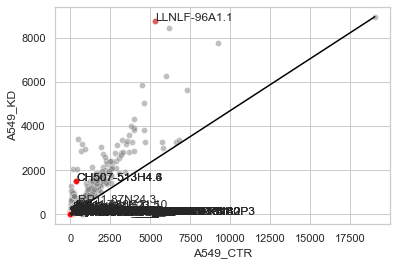

In [ ]:
def _prep_df(df_dict):
    plot_df = {}
    for name in df_dict: 
        df = df_dict[name]
        tpm_count = df["tpm"]
        plot_df.update(
            {
                name : list(tpm_count)
            }
        )

        if "name" not in plot_df:
            names = df["name"]
            feature = df["feature"]
            plot_df.update({"name" : list(names), "feature" : list(feature)})

    plot_df = pd.DataFrame(plot_df)
    return plot_df

def _scatter(df, color, line=True, label = False):
    names = [i for i in list(df.columns) if i not in ["name", "feature"]]
    assert len(names) == 2, "The names assignment does not work yet..."
    x_name = names[0]
    y_name = names[1]

    sns.set_theme(style="whitegrid")
    sns.scatterplot(
        data = df,
        x = x_name, y = y_name, 
        color = color,
        alpha = 0.5
    )
    if line == True: 
        plt.plot(
            (min(df[x_name]), max(df[x_name])),
            (min(df[y_name]), max(df[y_name])), 
            color = "black"
        )
    if label == True: 
        _label_points(df, x_name, y_name)

def _label_points(df, x_col, y_col, name_col = "name"):
    for name,  x_val, y_val in zip(df[name_col], df[x_col], df[y_col]):
        plt.text(x_val, y_val, name)


def scatter(df_dict, subset_queries):
    assert len(df_dict.keys()) == 2, "Currently, the scatter function only supports 2 dataframe inputs (for one figure)!"
    df = _prep_df(df_dict)
    _scatter(df, "gray")
    for subset in subset_queries:
        tmp = subset_queries[subset]
        color = tmp[0]
        query = tmp[1]
        tmp_df = _prep_df(df_dict)
        tmp_df = tmp_df.query(query)

        _scatter(tmp_df, color, line = False, label = True)    

scatter(
    df_A549_KD, {"lncRNAs" : ("red", "feature == 'lncRNA'")}
)


In [4]:
pwd

'/Volumes/Blue/GIT/RNA_Seq_Project21/Analysis'

In [6]:
all_df = pd.read_csv("../data/KALLISTO/merged_all.csv")

In [77]:
a = all_df.query("sample in ['A549_CTR', 'A549_KD']")

# a = a.groupby("gene_id").last().reset_index()

# a = a.query(
#     """(sample == 'A549_CTR' & tpm == tpm) | (sample == 'A549_KD' & tpm == tpm)"""
# )

a.groupby(["target_id"]).count().query("length > 1")


Unnamed: 0  length  \
target_id                                                                
ENST00000000233.10|ENSG00000004059.11|OTTHUMG00...           2       2   
ENST00000000412.8|ENSG00000003056.8|OTTHUMG0000...           2       2   
ENST00000000442.11|ENSG00000173153.17|OTTHUMG00...           2       2   
ENST00000001008.6|ENSG00000004478.8|OTTHUMG0000...           2       2   
ENST00000001146.7|ENSG00000003137.9|OTTHUMG0000...           2       2   
...                                                        ...     ...   
ENST00000684773.1|ENSG00000112319.20|OTTHUMG000...           2       2   
ENST00000684774.1|ENSG00000124356.17|OTTHUMG000...           2       2   
ENST00000684775.1|ENSG00000105642.16|OTTHUMG000...           2       2   
ENST00000684776.1|ENSG00000141556.22|OTTHUMG000...           2       2   
ENST00000684777.1|ENSG00000182923.20|OTTHUMG000...           2       2   

                                                    eff_length  est_counts  \
target_id                                                                    
ENST00000000233.10|ENSG00000004059.11|OTTHUMG00...           2           2   
ENST00000000412.8|ENSG00000003056.8|OTTHUMG0000...           2           2   
ENST00000000442.11|ENSG00000173153.17|OTTHUMG00...           2           2   
ENST00000001008.6|ENSG00000004478.8|OTTHUMG0000...           2           2   
ENST00000001146.7|ENSG00000003137.9|OTTHUMG0000...           2           2   
...                                                        ...         ...   
ENST00000684773.1|ENSG00000112319.20|OTTHUMG000...           2           2   
ENST00000684774.1|ENSG00000124356.17|OTTHUMG000...           2           2   
ENST00000684775.1|ENSG00000105642.16|OTTHUMG000...           2           2   
ENST00000684776.1|ENSG00000141556.22|OTTHUMG000...           2           2   
ENST00000684777.1|ENSG00000182923.20|OTTHUMG000...           2           2   

                                                    tpm  feature  name  \
target_id                                                                
ENST00000000233.10|ENSG00000004059.11|OTTHUMG00...    2        2     2   
ENST00000000412.8|ENSG00000003056.8|OTTHUMG0000...    2        2     2   
ENST00000000442.11|ENSG00000173153.17|OTTHUMG00...    2        2     2   
ENST00000001008.6|ENSG00000004478.8|OTTHUMG0000...    2        2     2   
ENST00000001146.7|ENSG00000003137.9|OTTHUMG0000...    2        2     2   
...                                                 ...      ...   ...   
ENST00000684773.1|ENSG00000112319.20|OTTHUMG000...    2        2     2   
ENST00000684774.1|ENSG00000124356.17|OTTHUMG000...    2        2     2   
ENST00000684775.1|ENSG00000105642.16|OTTHUMG000...    2        2     2   
ENST00000684776.1|ENSG00000141556.22|OTTHUMG000...    2        2     2   
ENST00000684777.1|ENSG00000182923.20|OTTHUMG000...    2        2     2   

                                                    gene_id  sample  
target_id                                                            
ENST00000000233.10|ENSG00000004059.11|OTTHUMG00...        2       2  
ENST00000000412.8|ENSG00000003056.8|OTTHUMG0000...        2       2  
ENST00000000442.11|ENSG00000173153.17|OTTHUMG00...        2       2  
ENST00000001008.6|ENSG00000004478.8|OTTHUMG0000...        2       2  
ENST00000001146.7|ENSG00000003137.9|OTTHUMG0000...        2       2  
...                                                     ...     ...  
ENST00000684773.1|ENSG00000112319.20|OTTHUMG000...        2       2  
ENST00000684774.1|ENSG00000124356.17|OTTHUMG000...        2       2  
ENST00000684775.1|ENSG00000105642.16|OTTHUMG000...        2       2  
ENST00000684776.1|ENSG00000141556.22|OTTHUMG000...        2       2  
ENST00000684777.1|ENSG00000182923.20|OTTHUMG000...        2       2  

[237012 rows x 9 columns]

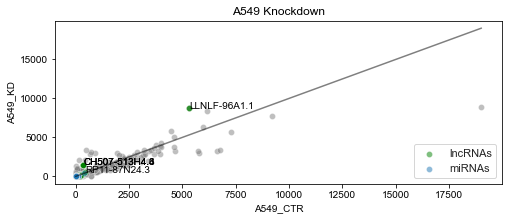

In [7]:
# we redefine scatter so as to work with the merged dataframe

def _prep_axis_df(df, axis_sample, **kwargs):
    """
    This function will prep a sub-dataframe for a given axis to be plotted in the scatterplot
    """
    sample_col = from_kwargs("sample_col", "sample", kwargs, rm = True)
    axis_df = df.query(f"{sample_col} == '{axis_sample}'")
    axis_df = axis_df.sort_values("target_id")
    return axis_df


def _prep_scatter_df(df, x_sample, y_sample, **kwargs):
    """
    This function prepares a total dataframe for x and y samples, and merges them so that they contain both the same entries in the same order
    """
    # perpare dataframes
    x_df = _prep_axis_df(df, x_sample, **kwargs)
    y_df = _prep_axis_df(df, y_sample, **kwargs)
    
    # merge dataframes together based on target_id
    new_df = x_df.merge(    
                        y_df, 
                        left_on = "target_id", 
                        right_on = "target_id", 
                        suffixes = (f"_{x_sample}", f"_{y_sample}")
                    )

    # now query for entries that have specified values in both x and y 
    # get x and y datasets to plot
    x_col = from_kwargs("x", f"tpm_{x_sample}", kwargs)
    y_col = from_kwargs("y", f"tpm_{y_sample}", kwargs)
    new_df = new_df.query(f"({x_col} == {x_col}) & ({y_col} == {y_col})")


    return new_df, x_col, y_col

def _scatter(df, x_sample, y_sample, line = True, add_labels = False, **kwargs):
    """
    This function perpares a scatterplot of two sample conditions (x_sample and y_sample) which are subsets of df
    Through kwargs can be adjusted: 
        x, y      the actual data columns used for plotting (default "tpm" )
        style     the sns.style used for plotting

    """
    # get reference plot (in case of subplots)
    base_fig = from_kwargs("ax", plt, kwargs)

    # perpare dataframes
    df, x_col, y_col = _prep_scatter_df(df, x_sample, y_sample, **kwargs)

    # get x and y datasets to plot
    x_vals = df[x_col]
    y_vals = df[y_col]
    
    assert len(x_vals) == len(y_vals), "The df columns for plotting are not equivalent!"


    # setup plot
    style = from_kwargs("style", "whitegrid", kwargs, rm = True)
    sns.set_theme(style=style)

    sns.scatterplot(
        x = x_vals, y = y_vals, 
        alpha = 0.5, 
        color = from_kwargs("color", None, kwargs),
        label = from_kwargs("label", None, kwargs),
        ax = from_kwargs("ax", None, kwargs),
    )
    if line == True: 
        min_overall = min([min(x_vals), min(y_vals)])
        max_overall = max([max(x_vals), max(y_vals)])
        line_vals = np.arange(min_overall, max_overall)
        base_fig.plot(
            
            line_vals, #(min(x_vals), max(x_vals)),
            line_vals, #(min(y_vals), max(y_vals)), 
            color = from_kwargs("line_color", "black", kwargs), 
            alpha = from_kwargs("line_alpha", None, kwargs), 
        )
    
    if add_labels == True: 
        _label_queries(df, x_sample, x_col, y_col, **kwargs)



def _prep_query_df(df, query):
    """
    This function prepares a subset dataframe for plotting according to specified queries
    """

    if not isinstance(query, (list, tuple, str)):
        raise TypeError("Queries have to be either a single string or a tuple of strings (len > 1) (which will be applied successively)")

    if isinstance(query, str):
        result = df.query(query)
    elif isinstance(query, (list, tuple)) and len(query) > 1:
        tmp_df = df.query(query[0])
        for q in query[1:]:
            tmp_df = tmp_df.query(q)
        result = tmp_df
    else: # in case the tuple only has one entry...
        result = df.query(query[0])
    
    return result 

def _label_queries(df, x_sample, x_col, y_col, **kwargs):
    """
    This function will add text labels to all datapoints that are part of a highlighted query-subset
    """
    # get the reference name column (has to be adjusted for renamed columns due to merged dfs from _prep_scatter_df)
    # as the order is the same for both dfs using x_sample or y_sample for referencing names is irrelevant
    name_col = from_kwargs("query_labels", "name", kwargs)
    name_col = f"{name_col}_{x_sample}"
    
    # get reference plot (in case of subplots)
    base_fig = from_kwargs("ax", plt, kwargs)

    # get the actual data points and labels to plot
    names = df[name_col]
    x_vals = df[x_col]
    y_vals = df[y_col]

    # get any offset for labels that may have been specified 
    x_offset = from_kwargs("query_label_xoff", 0.1, kwargs)
    y_offset = from_kwargs("query_label_yoff", 0.1, kwargs)
    label_size = from_kwargs("query_label_size", "small", kwargs)
    label_color = from_kwargs("query_label_color", "black", kwargs)

    # add labels
    for x, y, name in zip(x_vals, y_vals, names):
        base_fig.text(
            x + x_offset,
            y + y_offset,
            name,
            size = label_size,
            color = label_color
        )



def scatter(df, x_sample, y_sample, queries = None, **kwargs):
    """
    This function generates a scatterplot of the tpm counts of two samples (x_sample, y_sample)
    Using queries it is possible to additionaly plot colored subsets of the dataframe
    """

    # get some kwargs out if they're present (so they don't cause trouble when we pass them on...)
    legend_loc = from_kwargs("legend_loc", None, kwargs, rm = True)
    title = from_kwargs("title", None, kwargs, rm = True)
    figsize = from_kwargs("figsize", None, kwargs, rm = True)
    traceback = from_kwargs("traceback", None, kwargs, rm = True)
    draw_guide_line = from_kwargs("line", True, kwargs, rm = True)
    
    # get base_fig in case of subplots
    base_fig = from_kwargs("ax", None, kwargs)
    if base_fig is None:
        fig, ax = plt.subplots(nrows = 1, figsize=figsize)
    else: 
        ax = base_fig
        
    # plot once the base set
    _scatter(df, x_sample, y_sample, color = "gray", line = draw_guide_line, add_labels = False, **kwargs)

    # plot any subset-queries
    if queries is not None: 
        for query in queries:
            try: 
                # prep sample queries
                tmp_query = queries[query]
                color, q, add_query_labels, legend_name = _get_query_params(query, tmp_query)
                tmp_df = _prep_query_df(df, q)
                _scatter(tmp_df, x_sample, y_sample, 
                        color = color, line = False, 
                        label = legend_name,
                        add_labels = add_query_labels,
                        **kwargs
                    )    

            except Exception as e: 
                if traceback: 
                    raise e
                else:
                    print(Warning(f"Query '{query}' could not be processed...\nUse traceback=True to view the full Exception"))
            
            hide_legend = from_kwargs("hide_legend", False, kwargs)
            if hide_legend == False:
                ax.legend(loc = legend_loc)
            else: 
                ax.get_legend().remove()

    # update final plot specs such as labels...
    ax.set( xlabel = from_kwargs("xlabel", x_sample, kwargs),
            ylabel = from_kwargs("ylabel", y_sample, kwargs),
            xlim = from_kwargs("xlim", (None, None), kwargs),
            ylim = from_kwargs("ylim", (None, None), kwargs),
            title = title
        )
    

def _get_query_params(query_name, query):
    """
    This function will extract the three valid parameters in a query: 
    Queries have to be passed on as dictionaries to avoid ambiguities
        color   |   color (str)
        q       |   the query itself (str)
        labels  |   whether or not to add labels (bool)
        legend  |   wether or not to add query to legend (bool)
    """
    # we can conveniently re-purpose from_kwargs for this ^^
    color = from_kwargs("color", None, query)
    q = from_kwargs("q", None, query)
    add_labels = from_kwargs("labels", False, query)
    legend = from_kwargs("legend", query_name, query)
    # if bools were given just use default values
    if legend == False: legend = None 
    elif legend == True: legend = query_name

    if q is None: 
        print(Warning(f"Query '{query_name}' does not have an actual query statement \"q\"!"))
    return color, q, add_labels, legend


my_queries = {
    "lncRNAs" : {"color" : "green", "q" : "feature == 'lncRNA'"},
    "lncRNAs (big labeled)" : {"color" : "green", "q" : ("feature == 'lncRNA'", "tpm > 350"), "labels" : True, "legend" : False},
    "miRNAs" : {"q" : "feature == 'miRNA'"},
}

scatter(
        all_df, "A549_CTR", "A549_KD", queries = my_queries, 
        legend_loc = "lower right", 
        title = "A549 Knockdown",
        line_alpha = 0.5,
        figsize = (8, 3),
    )


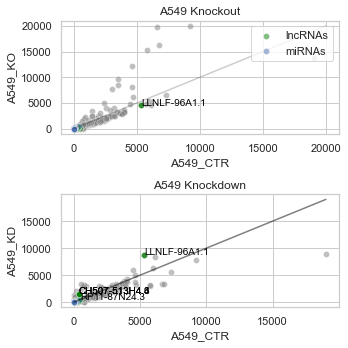

In [10]:
fig, ax = plt.subplots(nrows = 2, figsize = (5, 5))
scatter(
        all_df, "A549_CTR", "A549_KO", queries = my_queries, 
        title = "A549 Knockout",
        line_alpha = 0.2,
        figsize = (8, 3),
        traceback=True, 
        legend_loc = "upper right",
        ax = ax[0]
        )

scatter(
        all_df, "A549_CTR", "A549_KD", queries = my_queries, 
        legend_loc = "lower right", 
        title = "A549 Knockdown",
        line_alpha = 0.5,
        figsize = (8, 3),
        traceback=True, 
        hide_legend = True,
        ax = ax[1],
    )

plt.tight_layout()

In [11]:
# New Mission: we now use the ungrouped tsv datafiles and combine them manually so we can retain the triplicate values for 
# TPM and have not only their overall average. This will (hopefully) allow us some better analysis of differentially expressed genes and stuff...

In [28]:
ungrouped_loc = "../data/KALLISTO/tsv/ungrouped"

files = os.listdir(ungrouped_loc)
files = files[1:] # chop .DS_Store

metadata = pd.read_csv("../data/replicates.csv", sep = ";", names = ["sample", "cell_lines"])
metadata["cell_lines"] = [i.split(" ") for i in metadata["cell_lines"]]

src_files = {}
for sample, cell_lines in zip(metadata["sample"], metadata["cell_lines"]):
    
    src_files.update({
        sample : [f"{ungrouped_loc}/{i}/abundance.tsv" for i in cell_lines]
    })

src_files


{'A549_CTR': ['../data/KALLISTO/tsv/ungrouped/HD1/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD2/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD3/abundance.tsv'],
 'A549_KD': ['../data/KALLISTO/tsv/ungrouped/HD4/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD5/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD6/abundance.tsv'],
 'H358_CTR': ['../data/KALLISTO/tsv/ungrouped/HD7/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD8/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD9/abundance.tsv'],
 'H358_KD': ['../data/KALLISTO/tsv/ungrouped/HD10/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD11/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD12/abundance.tsv'],
 'H838_CTR': ['../data/KALLISTO/tsv/ungrouped/HD13/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD14/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD15/abundance.tsv'],
 'H838_KD': ['../data/KALLISTO/tsv/ungrouped/HD16/abundance.tsv',
  '../data/KALLISTO/tsv/ungrouped/HD17/abundance.tsv',


In [37]:
def merge_dfs(dfs:list, orient_on:str, suffixes:list):
    """
    This function merges several dataframes together
    """
    suffixes = [f"_{i}" for i in suffixes]
    new_df = dfs[0]
    sdx = 1 # index for the suffixes list...
    for i in dfs[1:]:
        new_df = new_df.merge(i, right_on = orient_on, left_on = orient_on, suffixes = suffixes[sdx-1:sdx+1])
        sdx += 1

    assert isinstance(new_df, pd.DataFrame), "new_df in merge_df is not properly made..."
    return new_df

In [38]:
ORIENT_ON = "target_id"
from statistics import mean 
from tsv_viz import * 

dfs = []
for i in src_files:
    idx = 1
    tmp = []
    tpm_cols = {}
    for src in src_files[i]:
        t = read_tsv(src)
        tpm_cols.update({idx : list(t["tpm"])})
        tmp.append(t)
        idx += 1
    suffixes = [str(i) for i in range(1, idx+1)]
    tmp_df = merge_dfs(tmp, orient_on = ORIENT_ON, suffixes = suffixes)
    tpm_cols = pd.DataFrame(tpm_cols)
    tmp_df["tpm"] = tpm_cols.mean(axis = 1)
    dfs.append(tmp_df)

dfs = pd.concat(dfs)

dfs.to_csv("../data/KALLISTO/tsv/ungrouped/merged_all.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../data/tsv/ungrouped/merged_all.csv'